# **Libraries**

In [1]:
import io
import os
from pathlib import Path
from PIL import Image 

import h5py
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = Path("analyze.ipynb")
project_path = str(path.parent.absolute().parent)

# **Functions**

In [3]:
def read_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(os.path.join(project_path, path))

def read_image(image_name: str) -> Image:
    with h5py.File(os.path.join(project_path, r"data\raw", "train-image.hdf5"), "r") as f:
        im = Image.open(io.BytesIO(f[image_name][()]))
    return im

# **Load Data**

In [5]:
train_df = read_csv("data/raw/train-metadata.csv")
test_df = read_csv("data/raw/test-metadata.csv")
sample_submission_df = read_csv("data/raw/sample_submission.csv")

/tmp/ipykernel_365648/2354339872.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(project_path, path))


In [ ]:
train_df.shape

(401059, 55)

In [ ]:
train_df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [9]:
train_df[train_df['target'] == 1].copy().sample(100, replace=True, random_state=1)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
29299,ISIC_0793445,1,IP_2456971,60.0,male,head/neck,1.92,TBP tile: close-up,3D: white,29.157143,...,IL_0679416,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,NaN,NaN,NaN,NaN,66.202366


# **Data Analysis**

### **Description**

**isic**: Unique case identifier. </br>
**target**: Binary class {0: benign, 1: malignant}. </br>
**patient_id**: Unique patient identifier. </br>
**age_approx**: Approximate age of patient at time of imaging. </br>
**sex**: Sex of the person. </br>
**anatom_site_general**: Location of the lesion on the patient's body. </br>
**clin_size_long_diam_mm**: Maximum diameter of the lesion (mm).+ </br>
**image_type**: Structured field of the ISIC Archive for image type. </br>
**tbp_tile_type**: Lighting modality of the 3D TBP source image. </br>
**tbp_lv_A**: A inside lesion.+ </br>
**tbp_lv_Aext**: A outside lesion.+ </br>
**tbp_lv_B**: B inside lesion.+ </br>
**tbp_lv_Bext**: B outside lesion.+ </br>
**tbp_lv_C**: Chroma inside lesion.+ </br>
**tbp_lv_Cext**: Chroma outside lesion.+ </br>
**tbp_lv_H**: Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+ </br>
**tbp_lv_Hext**: Hue outside lesion.+ </br>
**tbp_lv_L**: L inside lesion.+ </br>
**tbp_lv_Lext**: L outside lesion.+ </br>
**tbp_lv_areaMM2**: Area of lesion (mm^2).+ </br>
**tbp_lv_area_perim_ratio**: Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+ </br>
**tbp_lv_color_std_mean**: Color irregularity, calculated as the variance of colors within the lesion's boundary. </br>
**tbp_lv_deltaA**: Average A contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaB**: Average B contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaL**: Average L contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaLB**: </br>
**tbp_lv_deltaLBnorm**: Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+ </br>
**tbp_lv_eccentricity**: Eccentricity.+ </br>
**tbp_lv_location**: Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds.+ </br>
**tbp_lv_location_simple**: Classification of anatomical location, simple.+ </br>
**tbp_lv_minorAxisMM**: Smallest lesion diameter (mm).+ </br>
**tbp_lv_nevi_confidence**: Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++ </br>
tbp_lv_norm_border: Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+ </br>
**tbp_lv_norm_color**: Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+ </br>
**tbp_lv_perimeterMM**: Perimeter of lesion (mm).+ </br>
**tbp_lv_radial_color_std_max**: </br>
**tbp_lv_stdL**: Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+ </br>
**tbp_lv_stdLExt**: Standard deviation of L outside lesion.+ </br>
**tbp_lv_symm_2axis**: Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+ </br>
**tbp_lv_symm_2axis_angle**: Lesion border asymmetry angle.+ </br>
**tbp_lv_x**: X-coordinate of the lesion on 3D TBP.+ </br>
**tbp_lv_y**: Y-coordinate of the lesion on 3D TBP.+ </br>
**tbp_lv_z**: Z-coordinate of the lesion on 3D TBP.+ </br>
**attribution**: Image attribution, synonymous with image source. </br>
**copyright_license**: Copyright license. </br>
**lesion_id**: Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest. </br>
**iddx_full**: Fully classified lesion diagnosis. </br>
**iddx_1**: First level lesion diagnosis. </br>
**iddx_2**: Second level lesion diagnosis. </br>
**iddx_3**: Third level lesion diagnosis. </br>
**iddx_4**: Fourth level lesion diagnosis. </br>
**iddx_5**: Fifth level lesion diagnosis. </br>
**mel_mitotic_index**: Mitotic index of invasive malignant melanomas. </br>
**mel_thick_mm**: Thickness in depth of melanoma invasion. </br>
tbp_lv_dnn_lesion_confidence: Lesion confidence score (0-100 scale).+ </br>
'+ D’Alessandro, B. "Methods and apparatus for identifying skin features of interest." US Patent #11,164,670. (2021). </br>

### **Insights (basic)**

##### **Target**

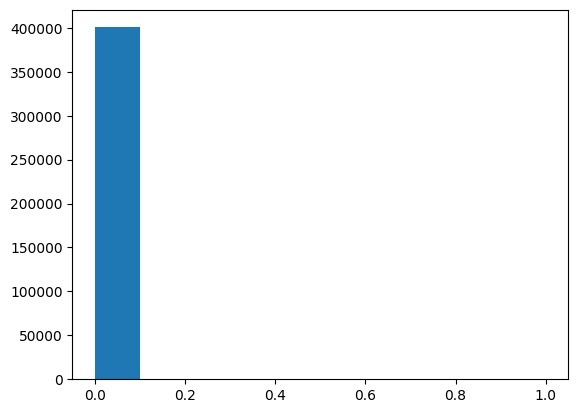

In [ ]:
plt.hist(train_df['target'])
plt.show()

Too few cancerous patiences </br>

##### **Age**

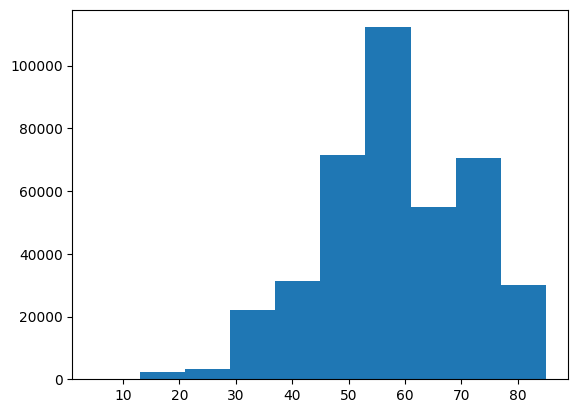

In [ ]:
plt.hist(train_df['age_approx'])
plt.show()

Most participiants are 50-60 years old </br>

##### **Anatom site general**

In [ ]:
train_df['anatom_site_general'].unique()

array(['lower extremity', 'head/neck', 'posterior torso',
       'anterior torso', 'upper extremity', nan], dtype=object)

In [ ]:
train_df['anatom_site_general'].isna().sum()

5756

Have 6 values: 
&nbsp;&nbsp;&nbsp;&nbsp;- Lower extremity: Hip, Thigh, Knee, Leg, Ankle, and Foot </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Head/neck: Head and Neck </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Posterior torso: Back </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Anterior torso: Front </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Upper extremity: Arm, Forearm, Writst, and Hand </br>
&nbsp;&nbsp;&nbsp;&nbsp;- NaN: not identify yet </br>
5756 values are nan (around 1.5%) </br>

##### **Clin size long diam mm**

<Axes: >

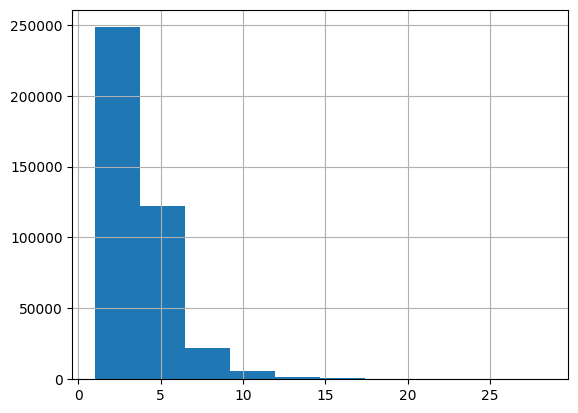

In [ ]:
train_df['clin_size_long_diam_mm'].hist()

The examine area is still mostly ranges from 0.2 to 0.4 </br>

##### **Image Type**

In [ ]:
train_df['image_type'].unique()

array(['TBP tile: close-up'], dtype=object)

Only one so I shouldn't care about it </br>

##### **TBP tile type**

In [ ]:
train_df['tbp_tile_type'].unique()

array(['3D: white', '3D: XP'], dtype=object)

In [ ]:
print("Total amount of white type:", train_df[train_df['tbp_tile_type'] == '3D: white'].shape)
print("Total amount of white type:", train_df[train_df['tbp_tile_type'] == '3D: XP'].shape)

Total amount of white type: (115156, 55)
Total amount of white type: (285903, 55)


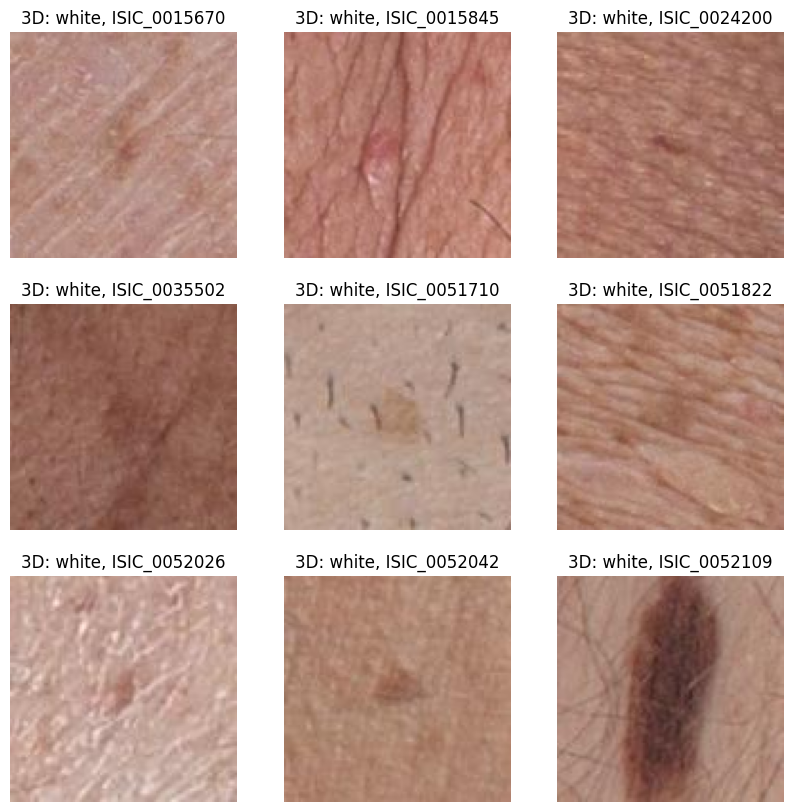

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image_id = train_df[train_df['tbp_tile_type'] == '3D: white']['isic_id'].iloc[i]
    image = read_image(image_id)
    plt.imshow(image)
    plt.title(f"3D: white, {image_id}")
    plt.axis("off")

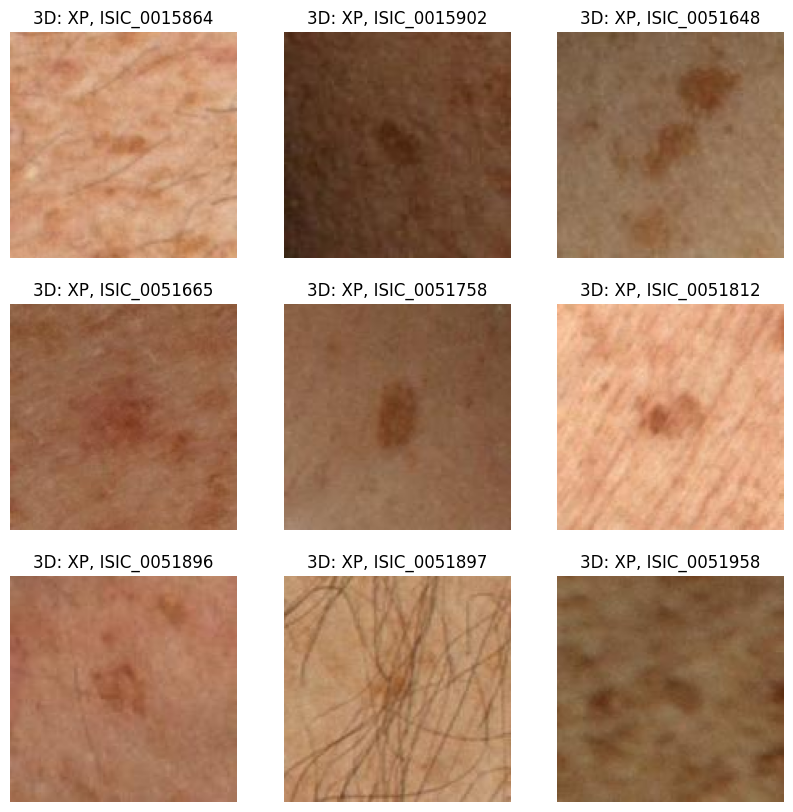

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image_id = train_df[train_df['tbp_tile_type'] == '3D: XP']['isic_id'].iloc[i]
    image = read_image(image_id)
    plt.imshow(image)
    plt.title(f"3D: XP, {image_id}")
    plt.axis("off")

Ratio between white and XP is 29:71

##### **TBP**

Mean inside: 19.974007 * 28.281706
Median inside: 19.801910 * 28.281706
Std inside: 3.999489 * 28.281706

Mean outside: 14.919247 * 26.913015
Median outside: 14.713930 * 26.913015
Std outside: 3.529384 * 26.913015


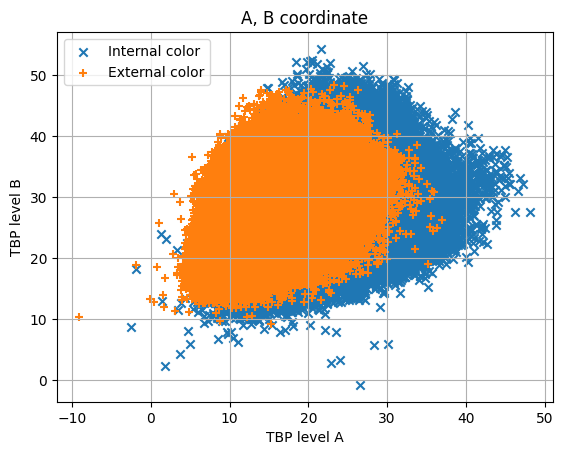

In [ ]:
print(f"Mean inside: {train_df['tbp_lv_A'].mean():2f} * {train_df['tbp_lv_B'].mean():2f}")
print(f"Median inside: {train_df['tbp_lv_A'].median():2f} * {train_df['tbp_lv_B'].mean():2f}")
print(f"Std inside: {train_df['tbp_lv_A'].std():2f} * {train_df['tbp_lv_B'].mean():2f}")
print()

print(f"Mean outside: {train_df['tbp_lv_Aext'].mean():2f} * {train_df['tbp_lv_Bext'].mean():2f}")
print(f"Median outside: {train_df['tbp_lv_Aext'].median():2f} * {train_df['tbp_lv_Bext'].mean():2f}")
print(f"Std outside: {train_df['tbp_lv_Aext'].std():2f} * {train_df['tbp_lv_Bext'].mean():2f}")

plt.scatter(train_df['tbp_lv_A'], train_df['tbp_lv_B'], marker="x")
plt.scatter(train_df['tbp_lv_Aext'], train_df['tbp_lv_Bext'], marker="+")
plt.xlabel("TBP level A")
plt.ylabel("TBP level B")
plt.title("A, B coordinate")
plt.legend(['Internal color', 'External color'], loc='upper left')
plt.grid()
plt.show()

Mean inside: 54.653689
Median inside: 55.035632
Std inside: 5.520849

Mean outside: 60.996869
Median outside: 61.109173
Std outside: 5.631909


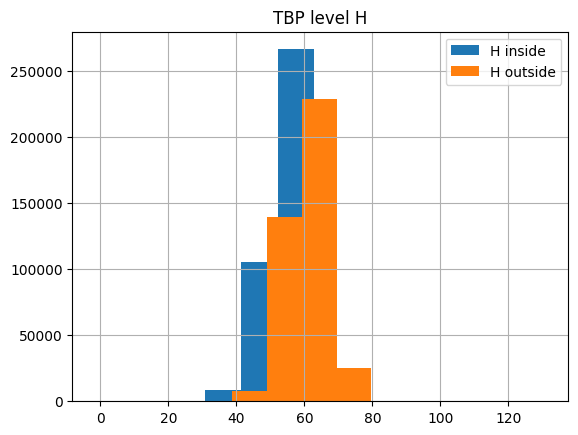

In [ ]:
print(f"Mean inside: {train_df['tbp_lv_H'].mean():2f}")
print(f"Median inside: {train_df['tbp_lv_H'].median():2f}")
print(f"Std inside: {train_df['tbp_lv_H'].std():2f}")
print()

print(f"Mean outside: {train_df['tbp_lv_Hext'].mean():2f}")
print(f"Median outside: {train_df['tbp_lv_Hext'].median():2f}")
print(f"Std outside: {train_df['tbp_lv_Hext'].std():2f}")

plt.hist(train_df['tbp_lv_H'])
plt.hist(train_df['tbp_lv_Hext'])
plt.title("TBP level H")
plt.legend(['H inside', 'H outside'])
plt.grid()
plt.show()

Mean inside: 42.289976
Median inside: 42.343770
Std inside: 10.864572

Mean outside: 51.199529
Median outside: 51.425557
Std outside: 12.100527


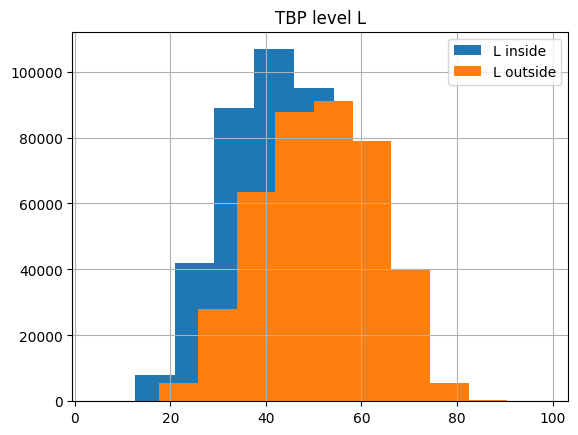

In [ ]:
print(f"Mean inside: {train_df['tbp_lv_L'].mean():2f}")
print(f"Median inside: {train_df['tbp_lv_L'].median():2f}")
print(f"Std inside: {train_df['tbp_lv_L'].std():2f}")
print()

print(f"Mean outside: {train_df['tbp_lv_Lext'].mean():2f}")
print(f"Median outside: {train_df['tbp_lv_Lext'].median():2f}")
print(f"Std outside: {train_df['tbp_lv_Lext'].std():2f}")

plt.hist(train_df['tbp_lv_L'])
plt.hist(train_df['tbp_lv_Lext'])
plt.legend(['L inside', 'L outside'])
plt.title('TBP level L')
plt.grid()
plt.show()

Mean: 8.539975
Median: 5.685870
Std: 9.679312


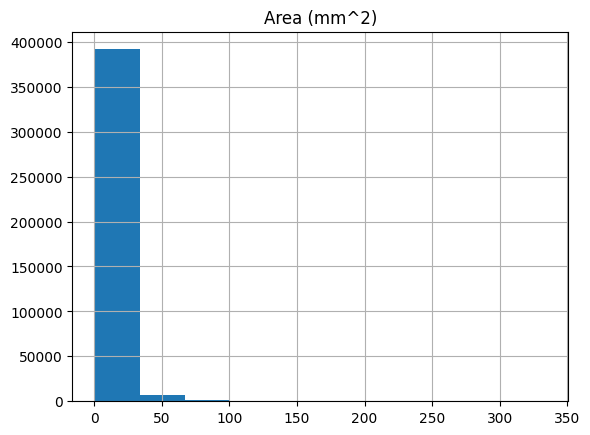

In [ ]:
print(f"Mean: {train_df['tbp_lv_areaMM2'].mean():2f}")
print(f"Median: {train_df['tbp_lv_areaMM2'].median():2f}")
print(f"Std: {train_df['tbp_lv_areaMM2'].std():2f}")

plt.hist(train_df['tbp_lv_areaMM2'])
plt.title('Area (mm^2)')
plt.grid()
plt.show()

Mean: 19.084517
Median: 17.423950
Std: 5.357863


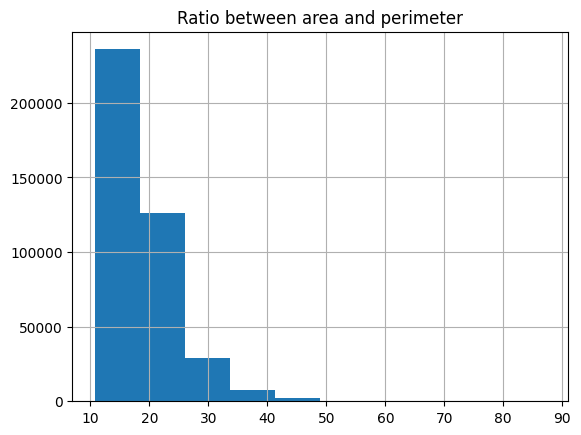

In [ ]:
print(f"Mean: {train_df['tbp_lv_area_perim_ratio'].mean():2f}")
print(f"Median: {train_df['tbp_lv_area_perim_ratio'].median():2f}")
print(f"Std: {train_df['tbp_lv_area_perim_ratio'].std():2f}")

plt.hist(train_df['tbp_lv_area_perim_ratio'])
plt.title('Ratio between area and perimeter')
plt.grid()
plt.show()

Mean: 1.070408
Median: 0.931402
Std: 0.762918


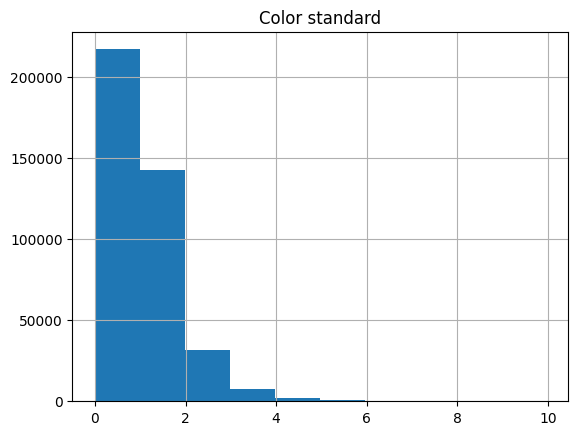

In [ ]:
print(f"Mean: {train_df['tbp_lv_color_std_mean'].mean():2f}")
print(f"Median: {train_df['tbp_lv_color_std_mean'].median():2f}")
print(f"Std: {train_df['tbp_lv_color_std_mean'].std():2f}")

plt.hist(train_df['tbp_lv_color_std_mean'])
plt.title('Color standard')
plt.grid()
plt.show()

Mean: 0.741238
Median: 0.768215
Std: 0.143857


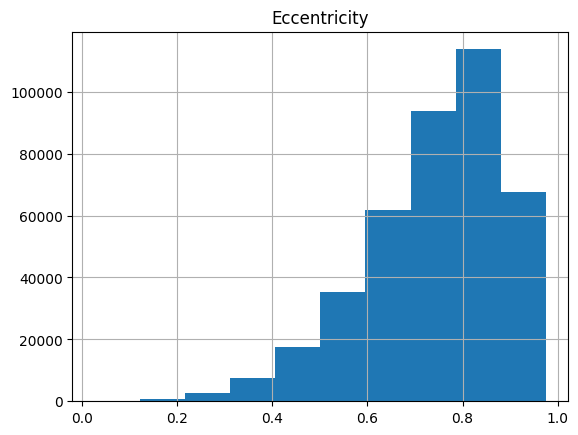

In [ ]:
print(f"Mean: {train_df['tbp_lv_eccentricity'].mean():2f}")
print(f"Median: {train_df['tbp_lv_eccentricity'].median():2f}")
print(f"Std: {train_df['tbp_lv_eccentricity'].std():2f}")

plt.hist(train_df['tbp_lv_eccentricity'])
plt.title('Eccentricity')
plt.grid()
plt.show()

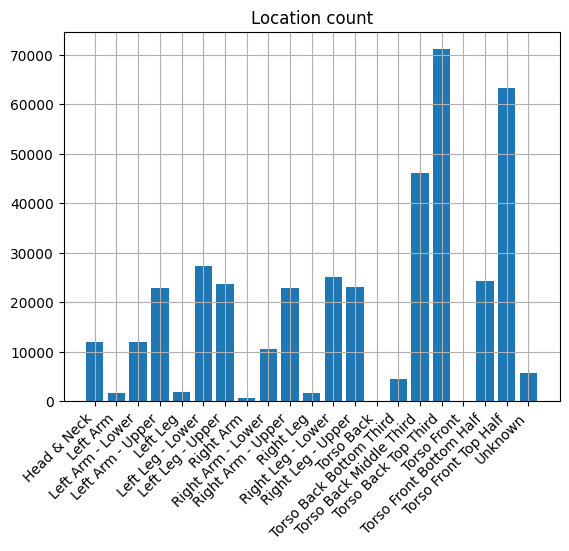

In [ ]:
location_df = train_df.groupby(["tbp_lv_location"]).count().reset_index()[['tbp_lv_location', 'isic_id']]
location_df['count'] = location_df['isic_id']
location_df = location_df.drop('isic_id', axis=1)

plt.bar(location_df['tbp_lv_location'], location_df['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Location count')
plt.grid()
plt.show()

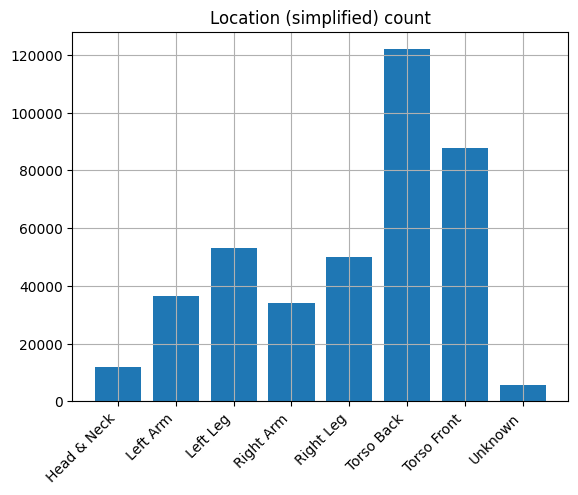

In [ ]:
location_df = train_df.groupby(["tbp_lv_location_simple"]).count().reset_index()[['tbp_lv_location_simple', 'isic_id']]
location_df['count'] = location_df['isic_id']
location_df = location_df.drop('isic_id', axis=1)

plt.bar(location_df['tbp_lv_location_simple'], location_df['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Location (simplified) count')
plt.grid()
plt.show()

Mean: 2.539773
Median: 2.265201
Std: 1.173169


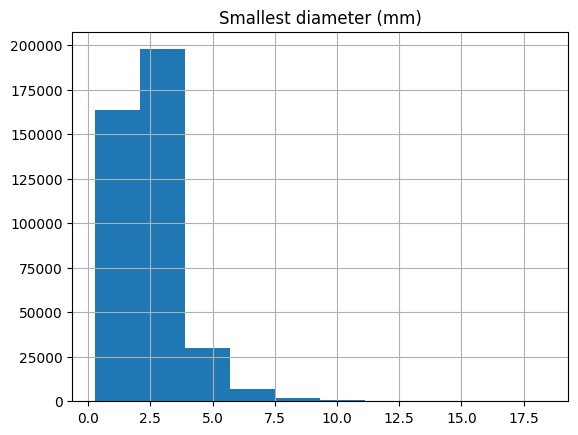

In [ ]:
print(f"Mean: {train_df['tbp_lv_minorAxisMM'].mean():2f}")
print(f"Median: {train_df['tbp_lv_minorAxisMM'].median():2f}")
print(f"Std: {train_df['tbp_lv_minorAxisMM'].std():2f}")

plt.hist(train_df['tbp_lv_minorAxisMM'])
plt.title('Smallest diameter (mm)')
plt.grid()
plt.show()

Mean: 38.520265
Median: 14.408514
Std: 41.480936


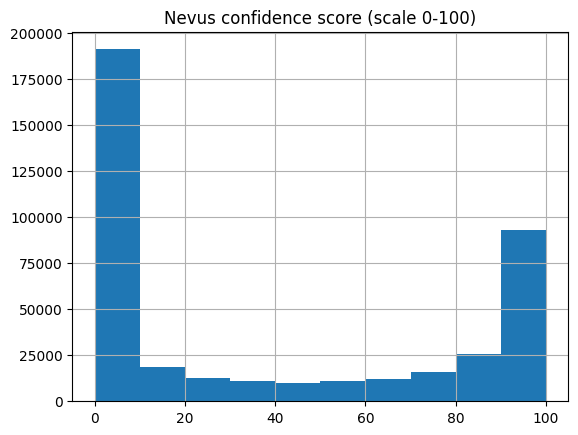

In [ ]:
print(f"Mean: {train_df['tbp_lv_nevi_confidence'].mean():2f}")
print(f"Median: {train_df['tbp_lv_nevi_confidence'].median():2f}")
print(f"Std: {train_df['tbp_lv_nevi_confidence'].std():2f}")

plt.hist(train_df['tbp_lv_nevi_confidence'])
plt.title('Nevus confidence score (scale 0-100)')
plt.grid()
plt.show()

Mean: 3.451523
Median: 2.996933
Std: 1.724557


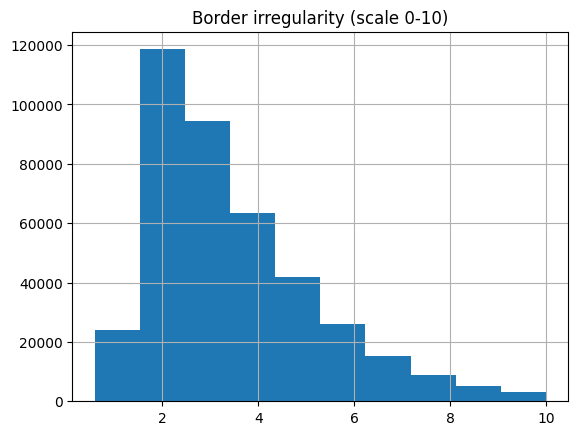

In [ ]:
print(f"Mean: {train_df['tbp_lv_norm_border'].mean():2f}")
print(f"Median: {train_df['tbp_lv_norm_border'].median():2f}")
print(f"Std: {train_df['tbp_lv_norm_border'].std():2f}")

plt.hist(train_df['tbp_lv_norm_border'])
plt.title('Border irregularity (scale 0-10)')
plt.grid()
plt.show()

Mean: 3.091590
Median: 2.764664
Std: 2.044813


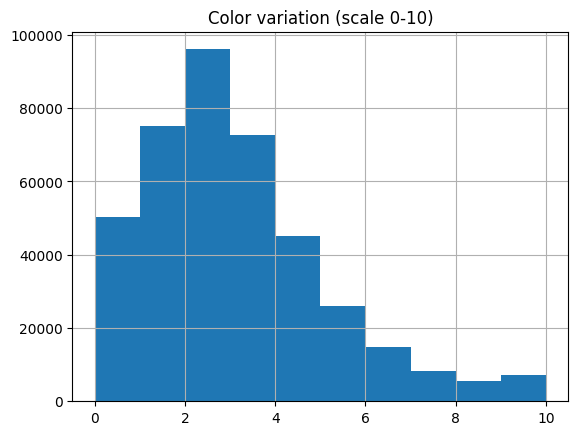

In [ ]:
print(f"Mean: {train_df['tbp_lv_norm_color'].mean():2f}")
print(f"Median: {train_df['tbp_lv_norm_color'].median():2f}")
print(f"Std: {train_df['tbp_lv_norm_color'].std():2f}")

plt.hist(train_df['tbp_lv_norm_color'])
plt.title('Color variation (scale 0-10)')
plt.grid()
plt.show()

Mean: 11.878891
Median: 10.015440
Std: 5.919302


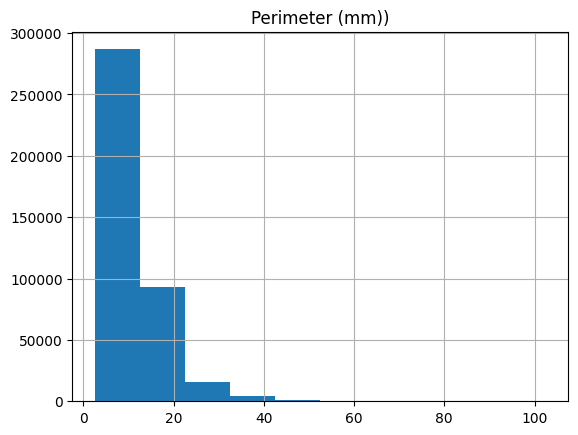

In [ ]:
print(f"Mean: {train_df['tbp_lv_perimeterMM'].mean():2f}")
print(f"Median: {train_df['tbp_lv_perimeterMM'].median():2f}")
print(f"Std: {train_df['tbp_lv_perimeterMM'].std():2f}")

plt.hist(train_df['tbp_lv_perimeterMM'])
plt.title('Perimeter (mm))')
plt.grid()
plt.show()

Mean: 1.016459
Median: 0.902281
Std: 0.734631


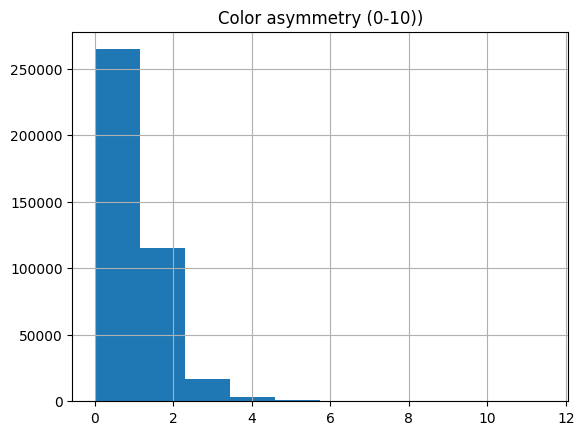

In [ ]:
print(f"Mean: {train_df['tbp_lv_radial_color_std_max'].mean():2f}")
print(f"Median: {train_df['tbp_lv_radial_color_std_max'].median():2f}")
print(f"Std: {train_df['tbp_lv_radial_color_std_max'].std():2f}")

plt.hist(train_df['tbp_lv_radial_color_std_max'])
plt.title('Color asymmetry (0-10))')
plt.grid()
plt.show()

Mean: 2.715190
Median: 2.186693
Std: 1.738165


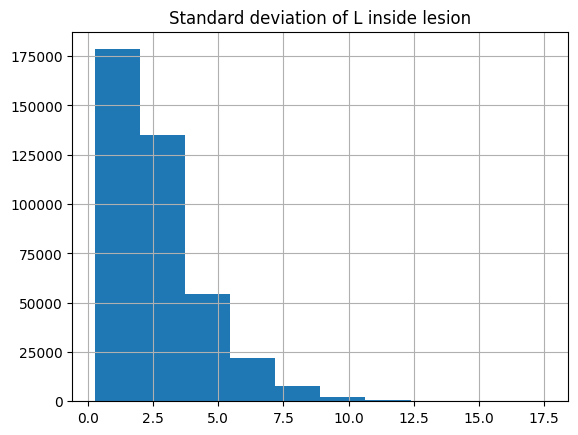

In [ ]:
print(f"Mean: {train_df['tbp_lv_stdL'].mean():2f}")
print(f"Median: {train_df['tbp_lv_stdL'].median():2f}")
print(f"Std: {train_df['tbp_lv_stdL'].std():2f}")

plt.hist(train_df['tbp_lv_stdL'])
plt.title('Standard deviation of L inside lesion')
plt.grid()
plt.show()

Mean: 2.238605
Median: 2.149758
Std: 0.623884


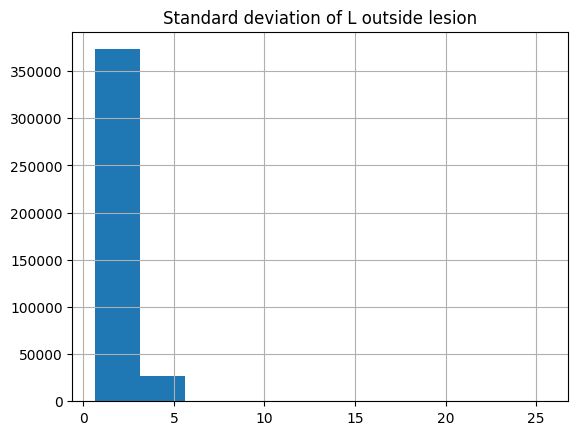

In [ ]:
print(f"Mean: {train_df['tbp_lv_stdLExt'].mean():2f}")
print(f"Median: {train_df['tbp_lv_stdLExt'].median():2f}")
print(f"Std: {train_df['tbp_lv_stdLExt'].std():2f}")

plt.hist(train_df['tbp_lv_stdLExt'])
plt.title('Standard deviation of L outside lesion')
plt.grid()
plt.show()

Mean: 0.306823
Median: 0.282297
Std: 0.125038


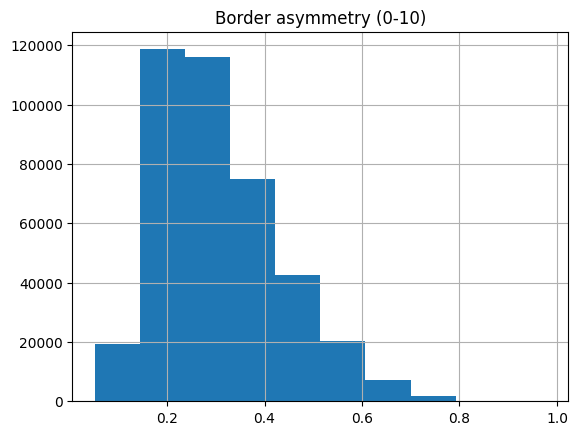

In [ ]:
print(f"Mean: {train_df['tbp_lv_symm_2axis'].mean():2f}")
print(f"Median: {train_df['tbp_lv_symm_2axis'].median():2f}")
print(f"Std: {train_df['tbp_lv_symm_2axis'].std():2f}")

plt.hist(train_df['tbp_lv_symm_2axis'])
plt.title('Border asymmetry (0-10)')
plt.grid()
plt.show()

Mean: 86.332073
Median: 90.000000
Std: 52.559511


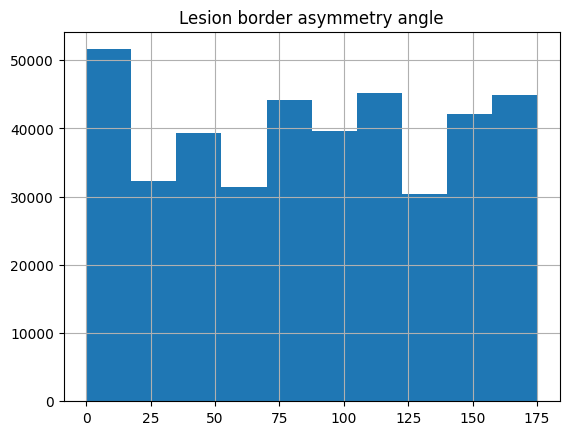

In [ ]:
print(f"Mean: {train_df['tbp_lv_symm_2axis_angle'].mean():2f}")
print(f"Median: {train_df['tbp_lv_symm_2axis_angle'].median():2f}")
print(f"Std: {train_df['tbp_lv_symm_2axis_angle'].std():2f}")

plt.hist(train_df['tbp_lv_symm_2axis_angle'])
plt.title('Lesion border asymmetry angle')
plt.grid()
plt.show()

Mean: -3.091862
Median: -5.747253
Std: 197.257995


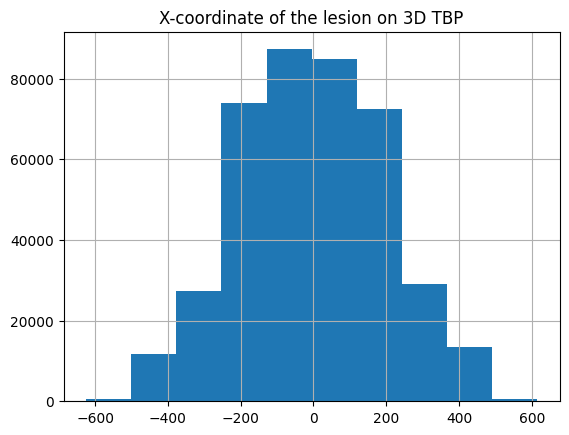

In [ ]:
print(f"Mean: {train_df['tbp_lv_x'].mean():2f}")
print(f"Median: {train_df['tbp_lv_x'].median():2f}")
print(f"Std: {train_df['tbp_lv_x'].std():2f}")

plt.hist(train_df['tbp_lv_x'])
plt.title('X-coordinate of the lesion on 3D TBP')
plt.grid()
plt.show()

Mean: 1039.598221
Median: 1172.803000
Std: 409.819653


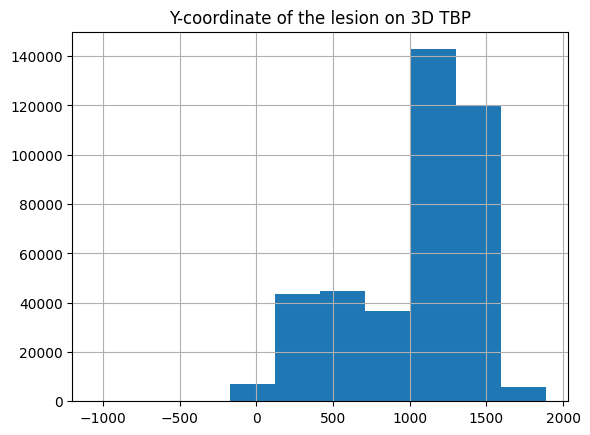

In [ ]:
print(f"Mean: {train_df['tbp_lv_y'].mean():2f}")
print(f"Median: {train_df['tbp_lv_y'].median():2f}")
print(f"Std: {train_df['tbp_lv_y'].std():2f}")

plt.hist(train_df['tbp_lv_y'])
plt.title('Y-coordinate of the lesion on 3D TBP')
plt.grid()
plt.show()

Mean: 55.823389
Median: 67.957947
Std: 87.968245


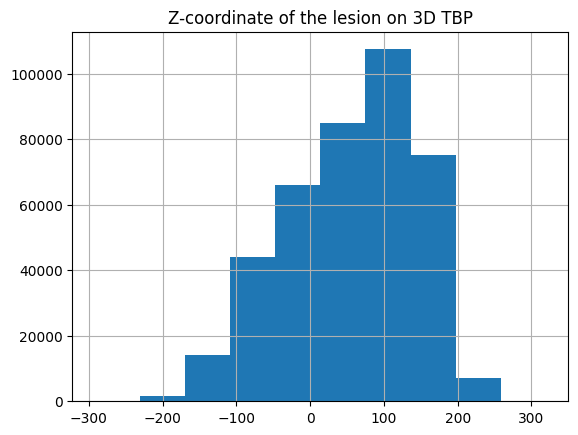

In [ ]:
print(f"Mean: {train_df['tbp_lv_z'].mean():2f}")
print(f"Median: {train_df['tbp_lv_z'].median():2f}")
print(f"Std: {train_df['tbp_lv_z'].std():2f}")

plt.hist(train_df['tbp_lv_z'])
plt.title('Z-coordinate of the lesion on 3D TBP')
plt.grid()
plt.show()

In [ ]:
train_df['iddx_full'].unique()

array(['Benign',
       'Benign::Benign epidermal proliferations::Lichen planus like keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, NOS, Junctional',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma in situ',
       'Benign::Benign melanocytic proliferations::Nevus',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Nodular',
       'Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive',
       'Indeterminate::Indeterminate epidermal proliferations::Solar or actinic keratosis',
       'Benign::Benign epidermal proliferations::Seborrheic keratosis',
       'Benign::Benign melanocytic proliferations::Nevus::Nevus, Atypical, Dysplastic, or Clark',
       'Malignant::Malignant adnexal epithelial proliferations - Follicular::Basal cell carcinoma::Basal cell carcinoma, Superficial',
       'Indeterminate::Indeterminate melanocytic prol

Mean: 0.670952
Median: 0.400000
Std: 0.792798


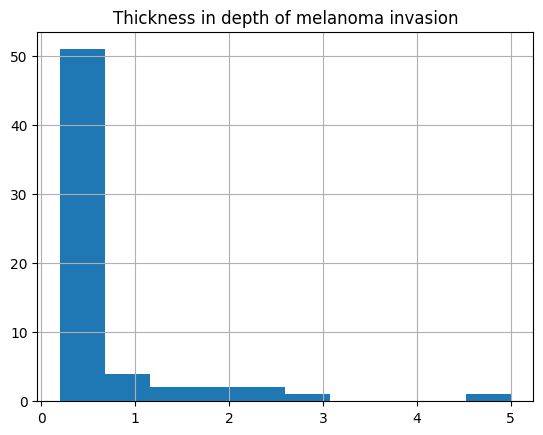

In [ ]:
print(f"Mean: {train_df['mel_thick_mm'].mean():2f}")
print(f"Median: {train_df['mel_thick_mm'].median():2f}")
print(f"Std: {train_df['mel_thick_mm'].std():2f}")

plt.hist(train_df['mel_thick_mm'])
plt.title('Thickness in depth of melanoma invasion')
plt.grid()
plt.show()

In [ ]:
print("Benign's unique melanoma values:", train_df[train_df['target'] == 0]['mel_thick_mm'].unique())
print("Malignant's unique melanoma values:", train_df[train_df['target'] == 1]['mel_thick_mm'].unique())

Benign's unique melanoma values: [nan]
Malignant's unique melanoma values: [ nan 0.5  0.9  0.4  1.3  0.2  0.3  5.   2.5  0.35 0.8  0.6  1.7  0.7
 0.32 0.55 1.8  3.   1.4  0.45]


Mean: 97.162204
Median: 99.994588
Std: 8.995782


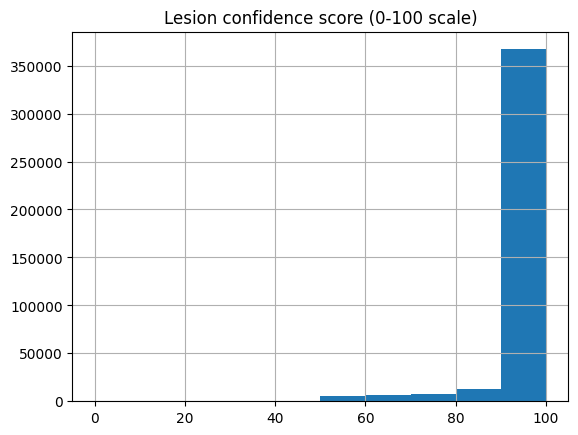

In [ ]:
print(f"Mean: {train_df['tbp_lv_dnn_lesion_confidence'].mean():2f}")
print(f"Median: {train_df['tbp_lv_dnn_lesion_confidence'].median():2f}")
print(f"Std: {train_df['tbp_lv_dnn_lesion_confidence'].std():2f}")

plt.hist(train_df['tbp_lv_dnn_lesion_confidence'])
plt.title('Lesion confidence score (0-100 scale)')
plt.grid()
plt.show()

### **Insight (advance)**

##### **Age x Perimeter and Area**

In [ ]:
def age_range(age: int) -> str:
    if age <= 40:
        return "40<=age"
    elif age <= 60:
        return "40<age<=60"
    else:
        return "age>60"

In [ ]:
age_area_perimeter = train_df[['age_approx', 'tbp_lv_areaMM2', 'tbp_lv_perimeterMM']].copy()
age_area_perimeter['age_range'] = age_area_perimeter.apply(lambda x: age_range(x['age_approx']), axis=1)
age_area_perimeter = age_area_perimeter.drop('age_approx', axis=1)
age_area_perimeter = age_area_perimeter.groupby(['age_range']).mean().reset_index()
age_area_perimeter.head()

,age_range,tbp_lv_areaMM2,tbp_lv_perimeterMM
0,40<=age,9.080116,11.787371
1,40<age<=60,8.392663,11.665265
2,age>60,8.509428,12.161053


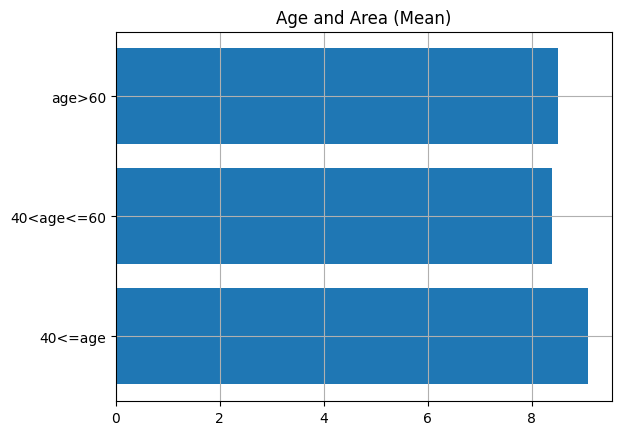

In [ ]:
plt.barh(age_area_perimeter['age_range'], age_area_perimeter['tbp_lv_areaMM2'])
plt.title('Age and Area (Mean)')
plt.grid()
plt.show()

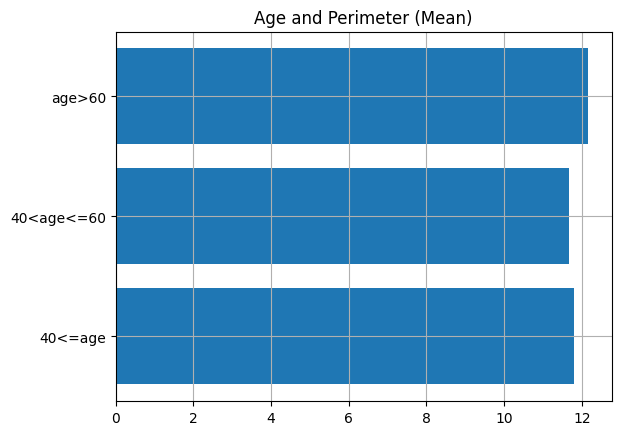

In [ ]:
plt.barh(age_area_perimeter['age_range'], age_area_perimeter['tbp_lv_perimeterMM'])
plt.title('Age and Perimeter (Mean)')
plt.grid()
plt.show()

##### **Location x Perimeter and Area**

In [ ]:
location_perimeter_area = train_df[['tbp_lv_location_simple', 'tbp_lv_areaMM2', 'tbp_lv_perimeterMM']].groupby(['tbp_lv_location_simple']).mean().reset_index()
location_perimeter_area.head()

,tbp_lv_location_simple,tbp_lv_areaMM2,tbp_lv_perimeterMM
0,Head & Neck,8.418450,12.173542
1,Left Arm,7.431996,11.338079
2,Left Leg,7.900230,11.515303
3,Right Arm,7.305962,11.313966
4,Right Leg,7.764975,11.450222


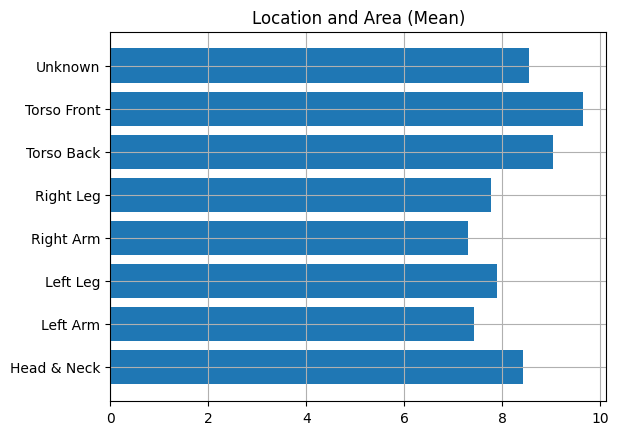

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_areaMM2'])
plt.title('Location and Area (Mean)')
plt.grid()
plt.show()

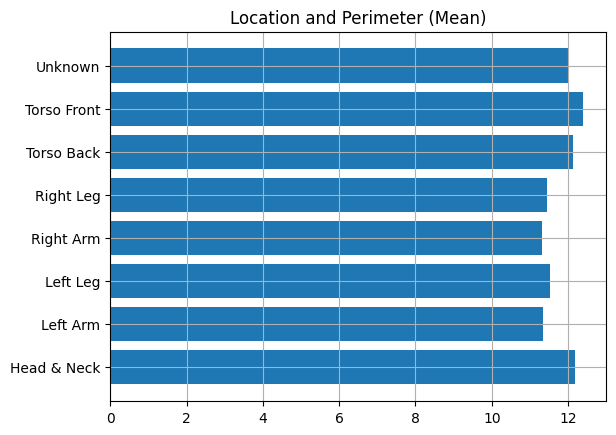

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_perimeterMM'])
plt.title('Location and Perimeter (Mean)')
plt.grid()
plt.show()

In [ ]:
location_perimeter_area = train_df[['tbp_lv_location_simple', 'tbp_lv_areaMM2', 'tbp_lv_perimeterMM']].groupby(['tbp_lv_location_simple']).median().reset_index()

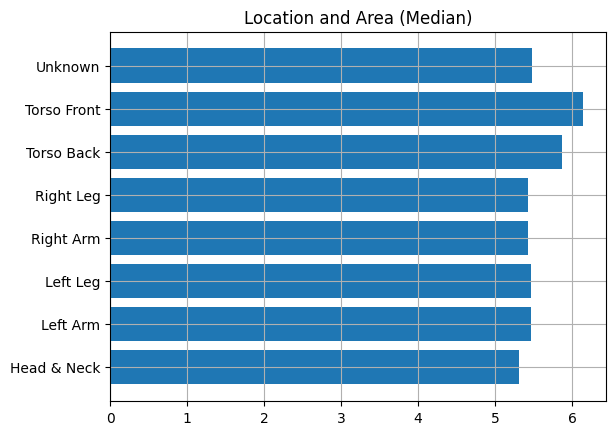

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_areaMM2'])
plt.title('Location and Area (Median)')
plt.grid()
plt.show()

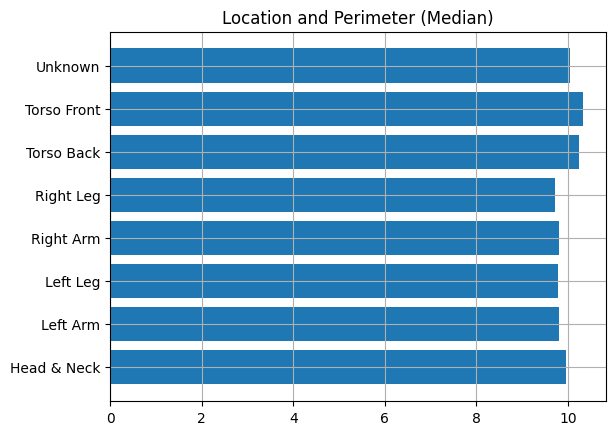

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_perimeterMM'])
plt.title('Location and Perimeter (Median)')
plt.grid()
plt.show()

In [ ]:
location_perimeter_area = train_df[['tbp_lv_location_simple', 'tbp_lv_areaMM2', 'tbp_lv_perimeterMM']].groupby(['tbp_lv_location_simple']).std().reset_index()

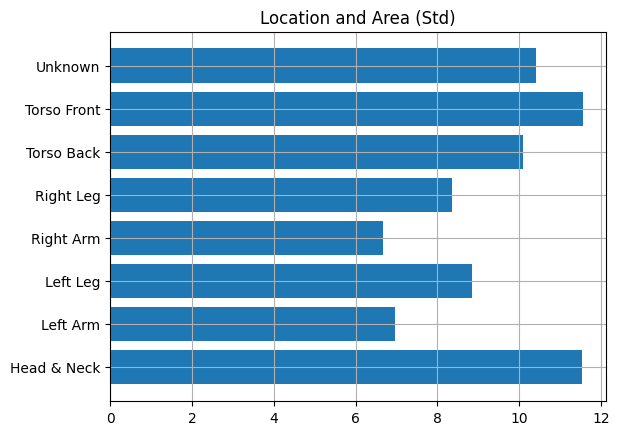

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_areaMM2'])
plt.title('Location and Area (Std)')
plt.grid()
plt.show()

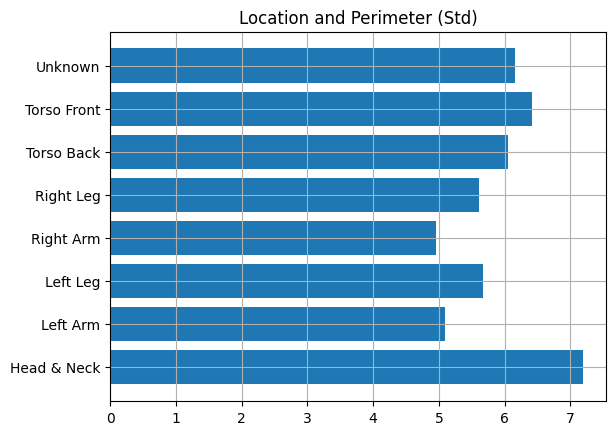

In [ ]:
plt.barh(location_perimeter_area['tbp_lv_location_simple'], location_perimeter_area['tbp_lv_perimeterMM'])
plt.title('Location and Perimeter (Std)')
plt.grid()
plt.show()

# **Evaluation**

In [ ]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

In [ ]:
thresholds

array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])

### **ROC and AUC**

ROC is the graph where x is false positive rate (FPR) and y is true positive rate (TPR) </br>
FPR = (false positive) / (false positive + true negative) </br>
TPR = (true positive) / (true positive + false negative) </br>
threshold r: </br>
&nbsp;&nbsp;&nbsp;&nbsp;- If probability p > r then class 2 (positive) </br>
&nbsp;&nbsp;&nbsp;&nbsp;- If probability p <= r then class 1 (negative) </br>


Let's suppose that the true labels = [1, 1, 2, 2], the prediction probability is [0.1, 0.4, 0.35, 0.8], and the thresholds is [inf, 0.8, 0.4, 0.35, 0.1] </br>

Case 1: threshold = 0.8 </br>
The predicted labels will be [1, 1, 1, 1]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;2 </br>
TPR = 0 </br>
FPR = 0 </br>

Case 2: threshold = 0.4 </br>
The predicted labels will be [1, 1, 1, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;2 </br>
TPR = 0.5 </br>
FPR = 0 </br>

Case 3: threshold = 0.35 </br>
The predicted labels will be [1, 2, 1, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;1 </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;1 </br>
TPR = 0.5 </br>
FPR = 0.5 </br>

Case 4: threshold = 0.1 </br>
The predicted labels will be [1, 2, 2, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;1 </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;1 </br>
TPR = 1 </br>
FPR = 0.5 </br>

case 5: threshold = inf </br>
The predicted labels will be [1, 1, 1, 1]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;2 </br>
TPR = 0 </br>
FPR = 0 </br>

So the TPRs = [0, 0, 0.5, 0.5, 1], FPRs = [0, 0, 0, 0.5, 0.5]

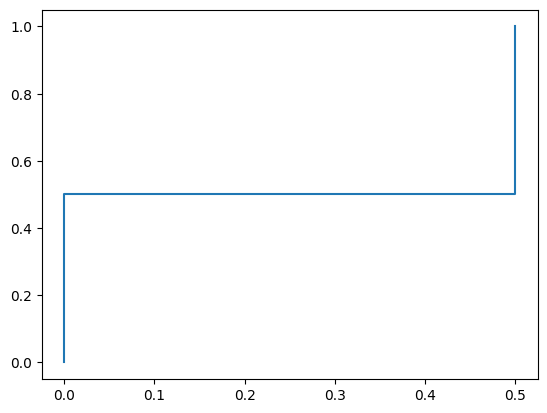

In [ ]:
tprs = [0, 0, 0.5, 0.5, 1]
fprs = [0, 0, 0, 0.5, 0.5]

plt.plot(fprs, tprs)
plt.show()

I doubt that sklearn thresholds miss 0
If 0 in thresholds, the AUC (Area under the curve) will be 1/2 + 1/4 = 0.75